In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from utils import ICV_color_histogram

In [2]:
# Task A: Write a histogram function that returns the colour histogram of an input image. Visualize the histogram 
# and save the corresponding figure. For a given video sequence, use the above function to construct
# the histogram of each frame

# This is written in utils.py

In [3]:
# # This function creates histograms for RGB values of an image and saves them to the output/segmentation directory
# # It takes two parameters
# #   1. index: this integer value is used for the naming convention of the saved image
# #   2. image: an image to process the RGB values

# def color_histogram(index, image):

#     # Convert the index to a string to avoid conflicts with saving
#     index = str(index)

#     # Separate RGB color channels
#     red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

#     # Use Numpy Flatten to convert the arrays to 1-D to be processed by Histogram
#     # For example, this converts a frame of 960 x 1280 to an array of 1,228,800 x 1
#     red_pixels = red.flatten()
#     green_pixels = green.flatten()
#     blue_pixels = blue.flatten()

#     # Overlay histograms of the pixels of each color in the bottom subplot
#     plt.figure(figsize=(12, 12))
#     plt.hist(red_pixels, bins=256, density=False, color='red', histtype='step')
#     plt.hist(green_pixels, bins=256, density=False, color='green', histtype='step')
#     plt.hist(blue_pixels, bins=256, density=False, color='blue', histtype='step')

#     # Update the title and labels of the figures
#     plt.title('RGB Values for Image ' + index)
#     plt.ylabel('RGB Counts')
#     plt.xlabel('RGB Values')

#     # Save the figure
#     plt.savefig(fname=f'./output/segmentation/figures/figure{index}.png')

#     # Return RGB pixel values for processing distance
#     return [red_pixels, green_pixels, blue_pixels]


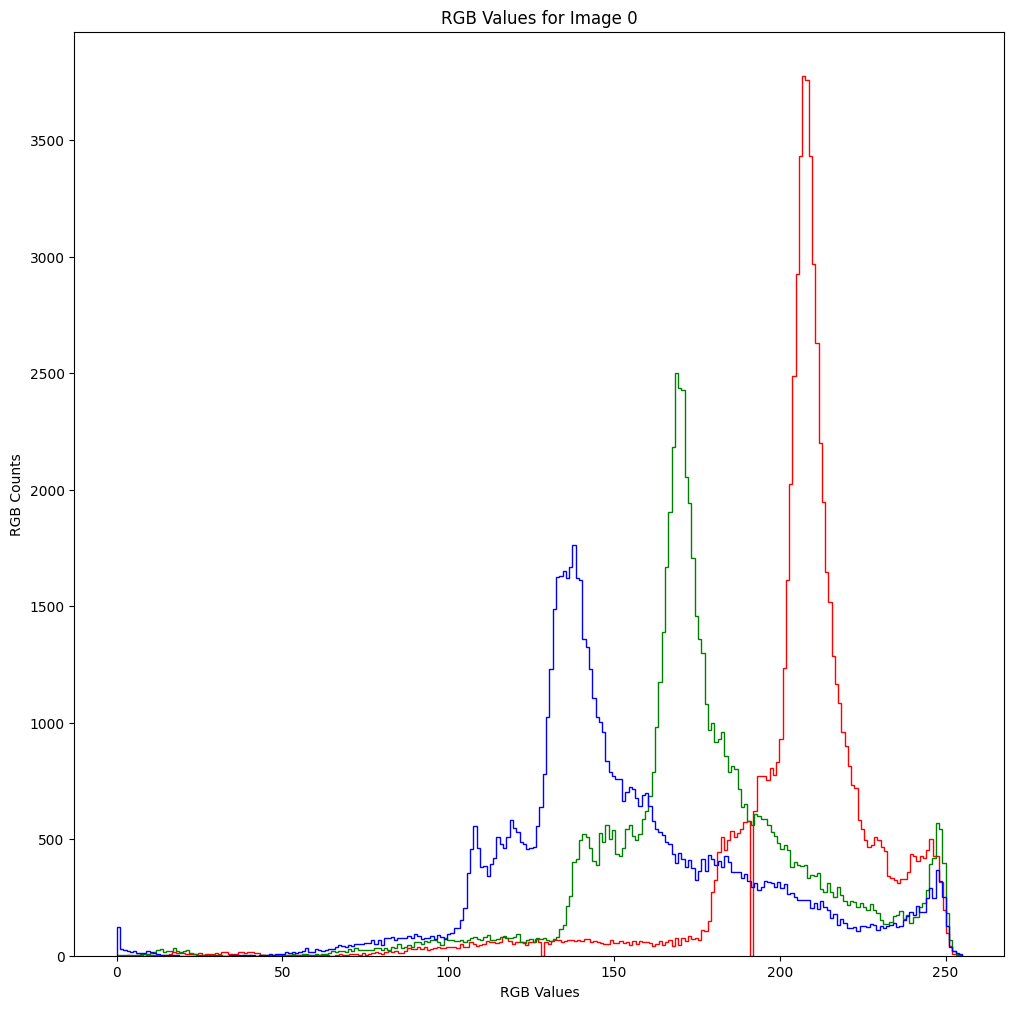

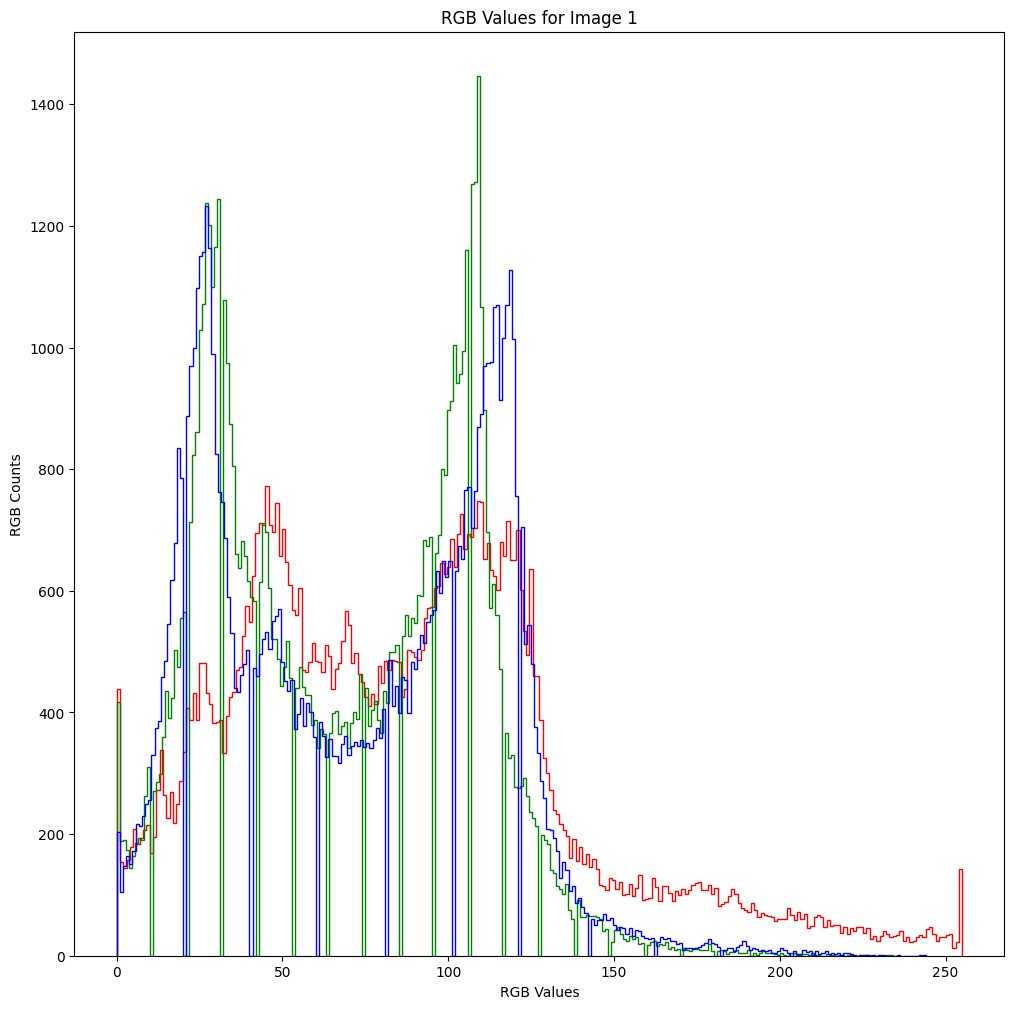

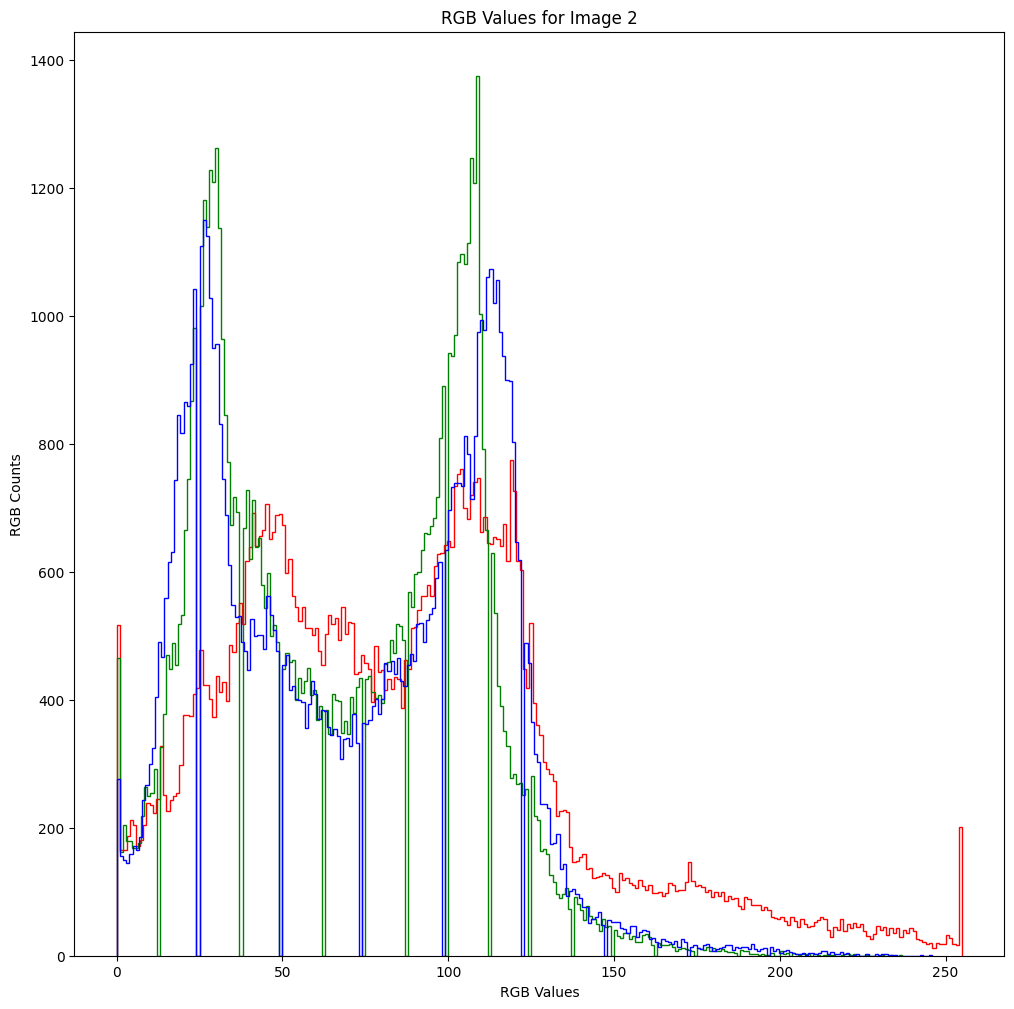

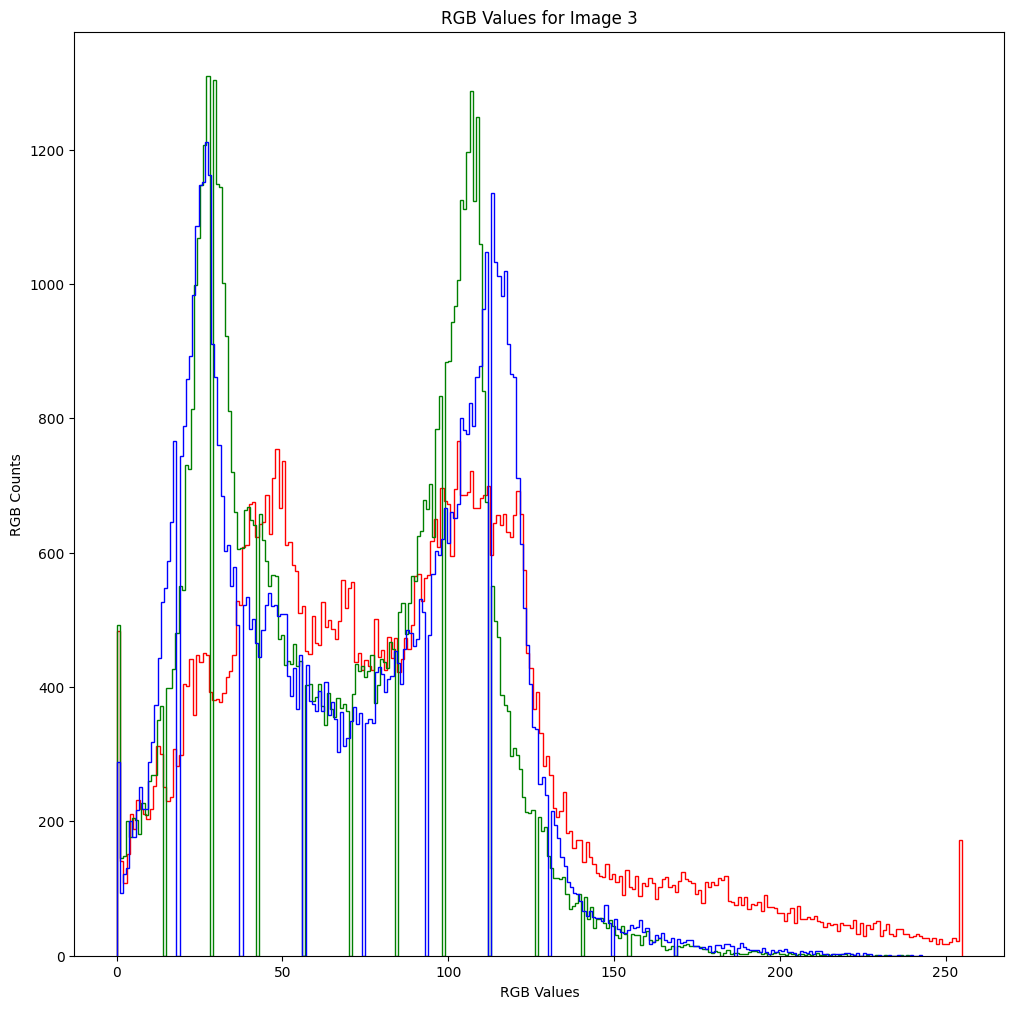

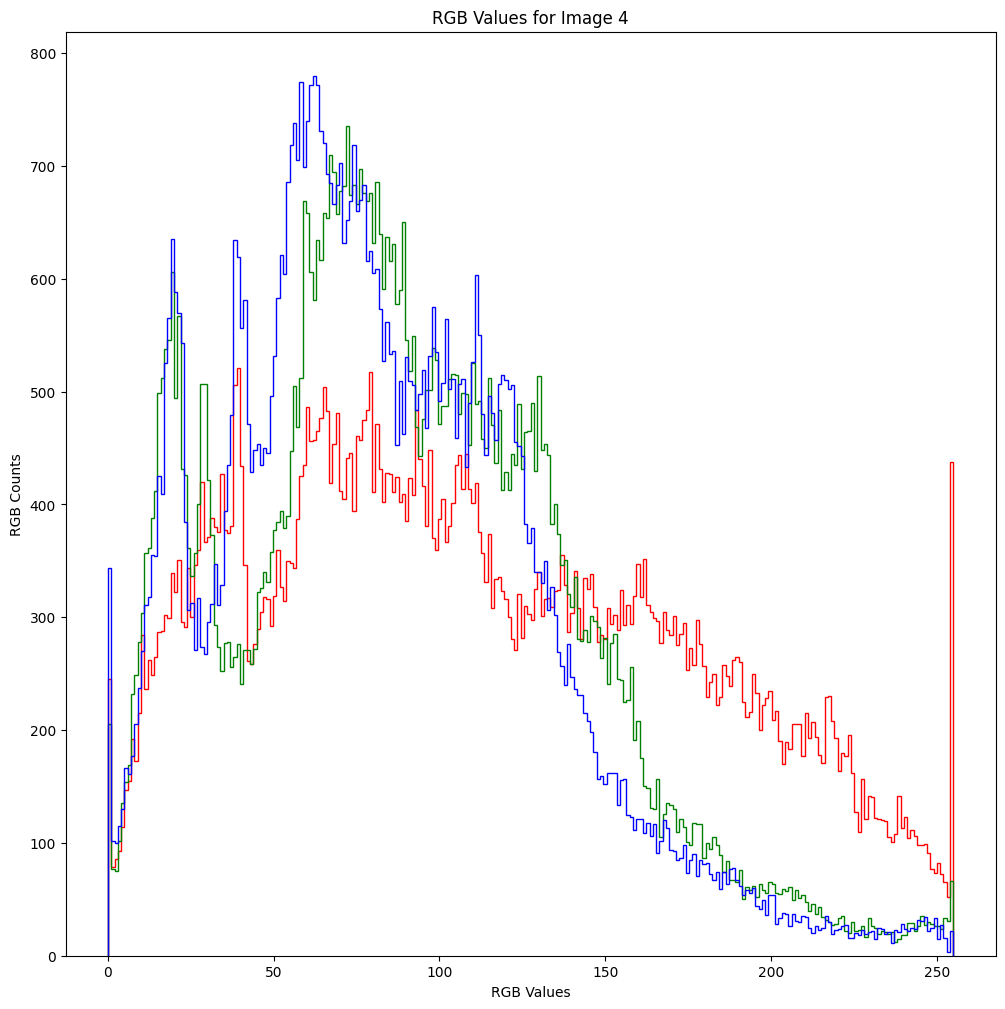

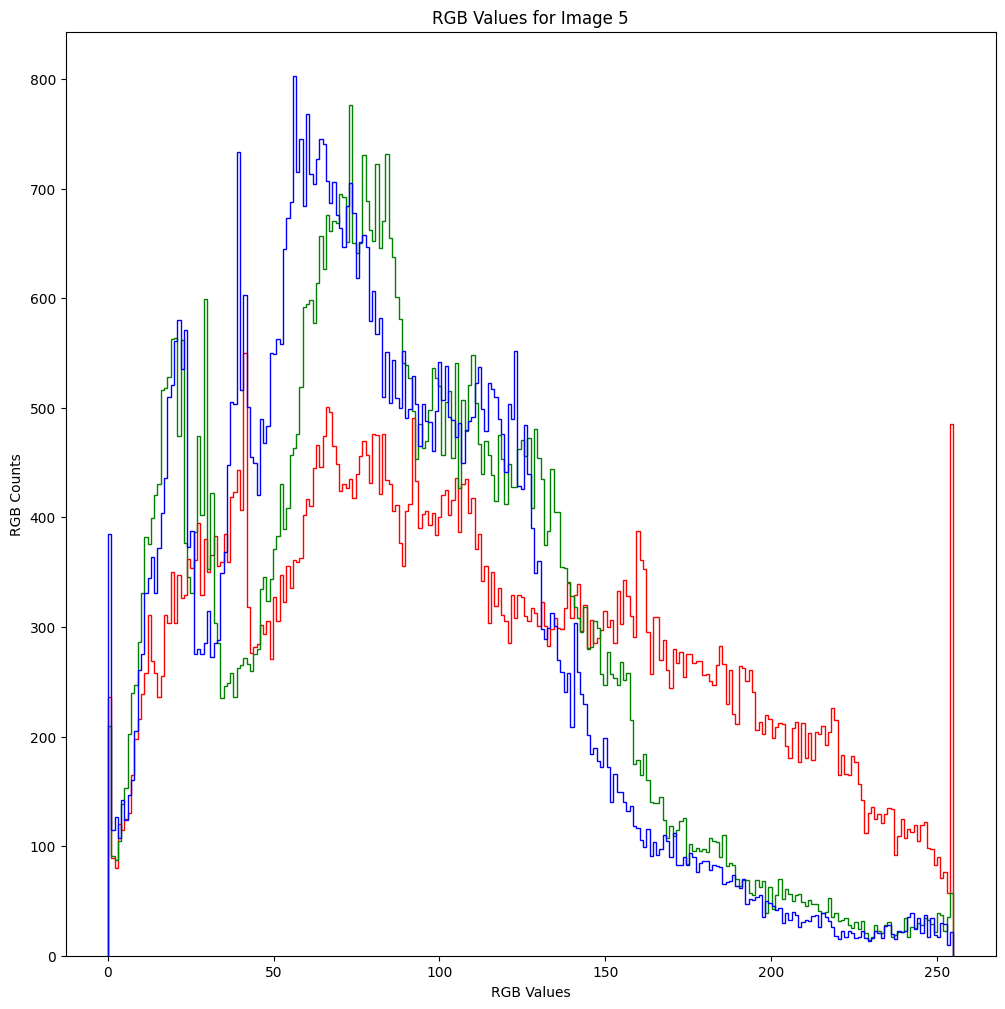

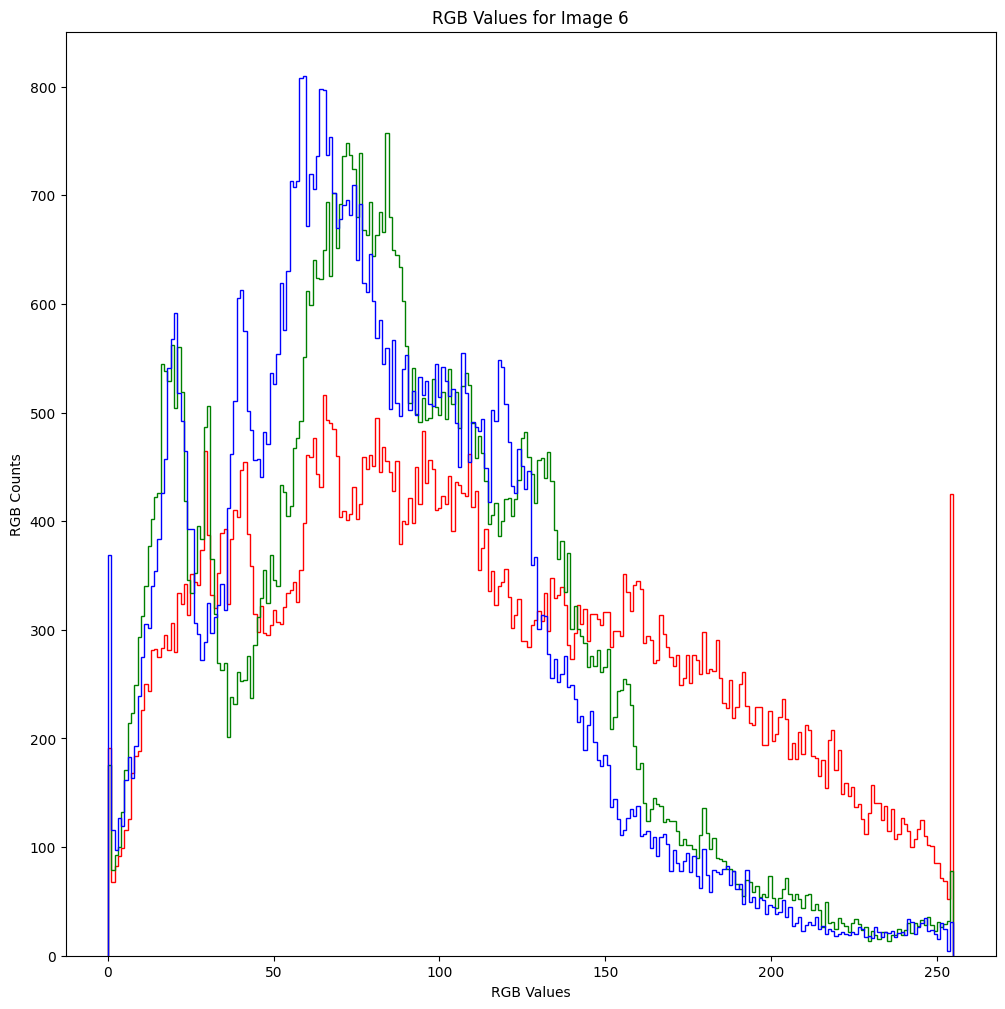

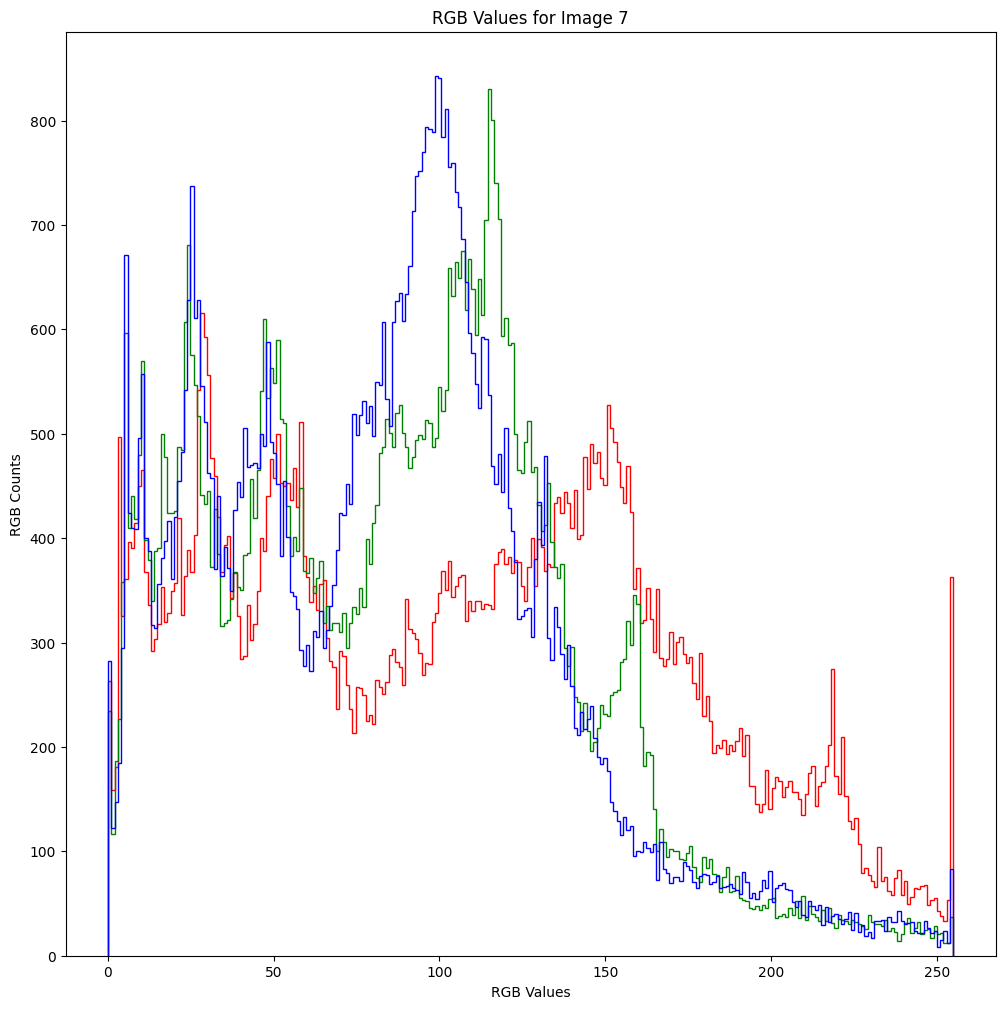

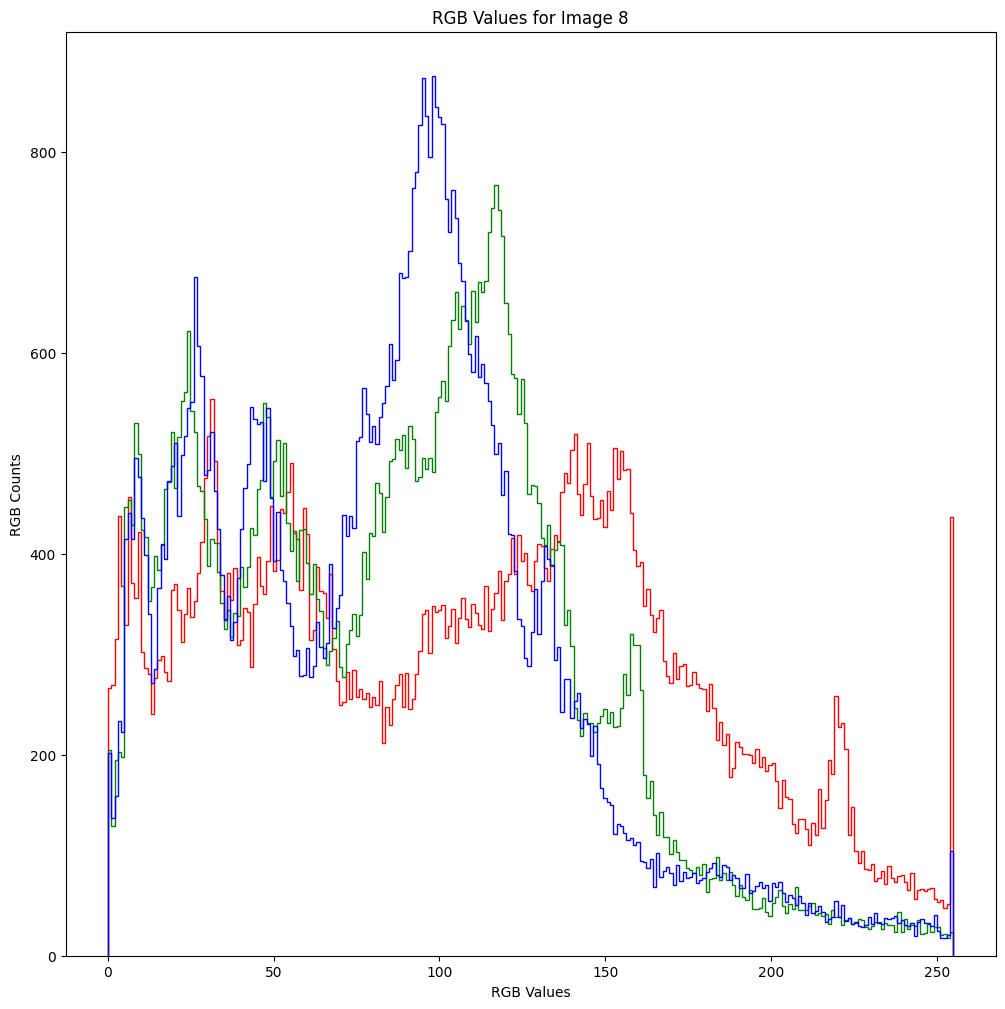

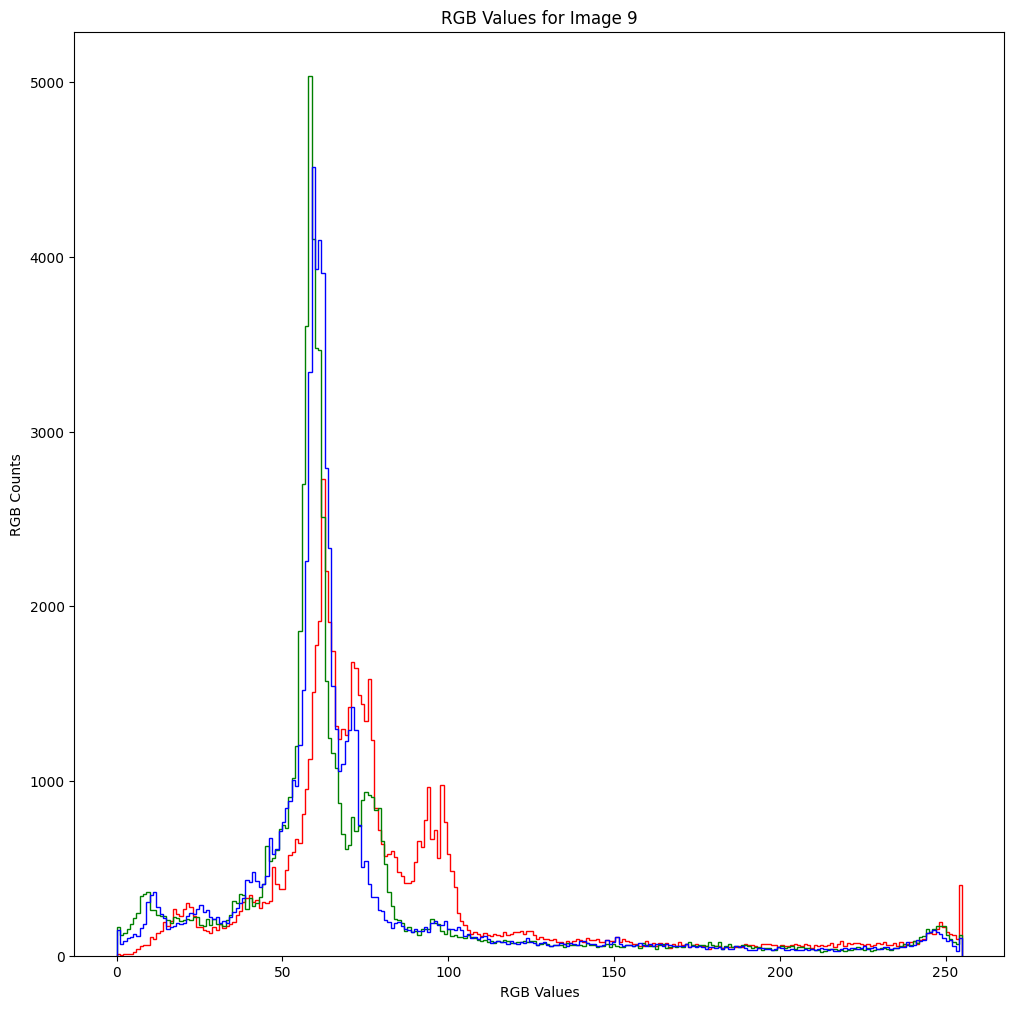

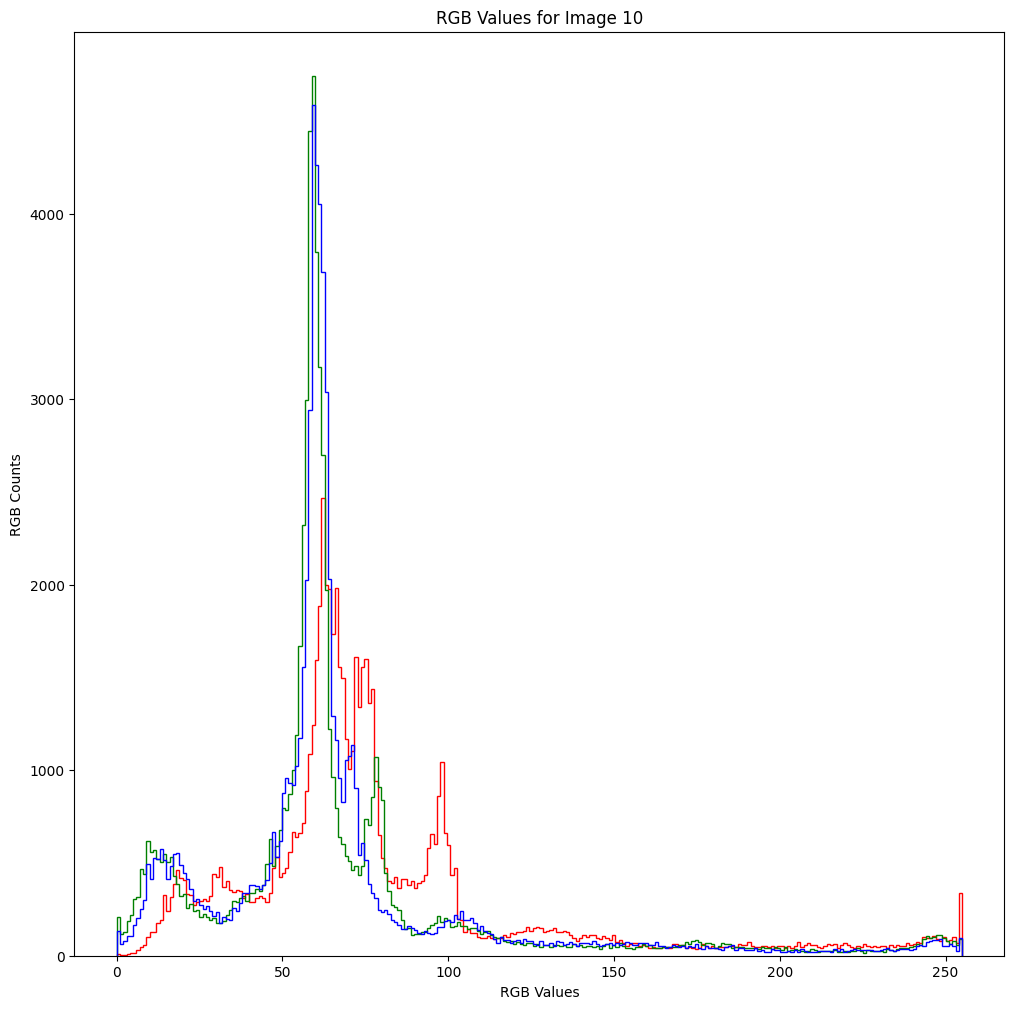

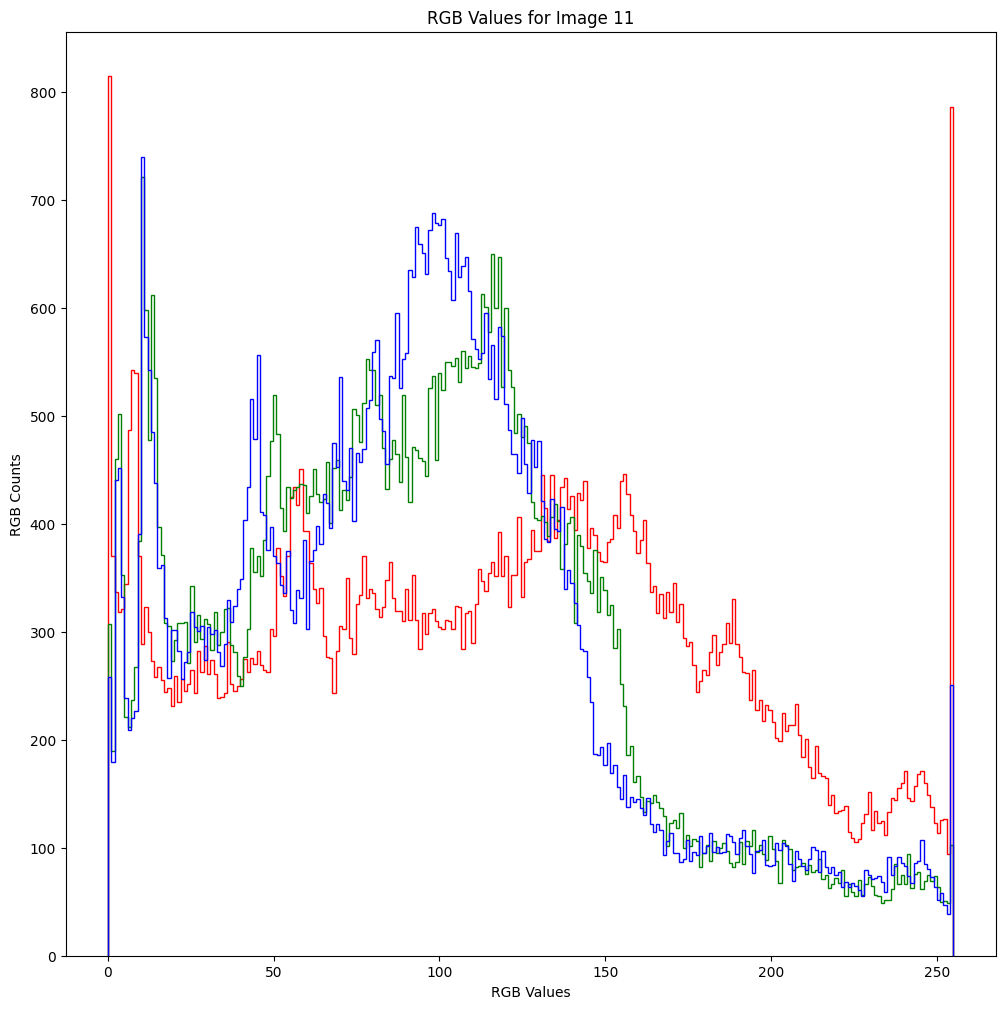

In [4]:
# Capture images of scenes from the video provided in Dataset B.
# To simplify the assignment, a frame is processed every second instead of every frame
# This results in 12 frames for 12 seconds instead of ~360 frames (30 frames per second * 12 seconds)

# Read in video from DatasetB and determine total amount of frames to process
frames = cv2.VideoCapture("../../data/DatasetB.avi")

# Determine the fps and duration of the video
fps = frames.get(cv2.CAP_PROP_FPS)
total_frames = int(frames.get(cv2.CAP_PROP_FRAME_COUNT))
duration = total_frames/fps

# Exit the program if the frames cannot be read
if not frames.isOpened():
    print('Unable to open')
    exit(0)

# An index will be incremented for each image captured and used for the naming convention of saving the image
index = 0

# Create a dictionary to capture color metrics
video_color_metrics = []

# Loop through the frames and every second save the image, create the color histogram, and capture the color metrics
for i in range(total_frames):

    # Break if the frame is not read
    ret, frame = frames.read()
    if frame is None:
        break
    
    # Capture an image every second (or every 30 frames per second)
    if i % fps == 0:
        
        # Save the frame as an image for visual comparison
        cv2.imwrite('../../output/cw3/video_out/frame' + str(index) + '.png', frame)
        
        # Save the color histogram of each for visual comparison and return color values
        frame_color_metrics = ICV_color_histogram(index, frame)

        # Update list for histogram distance processing
        video_color_metrics = frame_color_metrics
        
        # Step the index
        index += 1


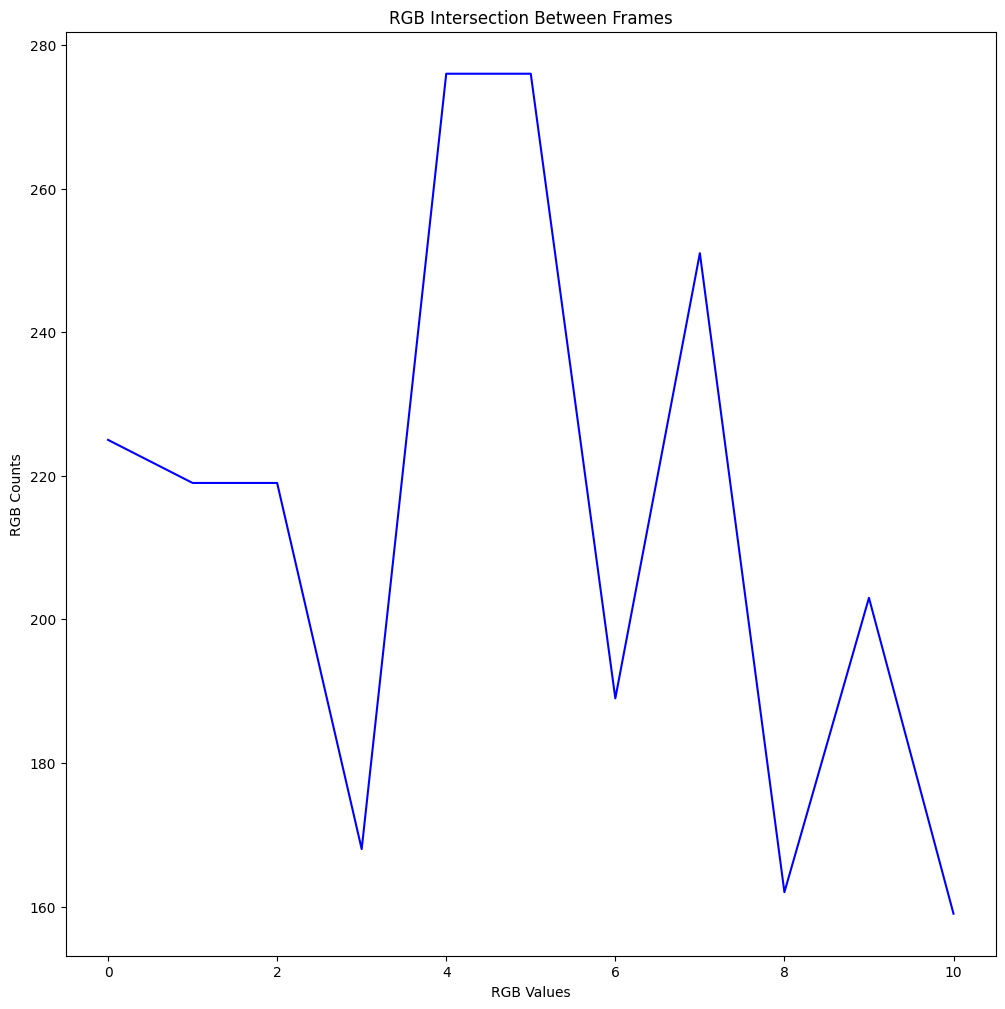

In [6]:
# Compute the histogram intersection between frames to determine change in scene

# Determine the amount of images captured from the video
directory = "../../output/cw3/video_out/"
file_count = os.listdir(directory) # your directory path
file_count = len(file_count)

# Initial array to capture histogram processing results to be used for plotting
plot = []

# Loop through the images and compute the histogram intersection
for i in range(file_count):

    # Stop increment on last image since there is nothing else to compare
    if i == (file_count-1):
        break

    # Capture RGB values for current image
    image1 = cv2.imread(f'{directory}/frame{i}.png')
    red1 = image1[:,:,0].flatten()
    green1 = image1[:,:,1].flatten()
    blue1 = image1[:,:,2].flatten()

    # Capture RGB values for next image
    image2 = cv2.imread(f'{directory}/frame{i+1}.png')
    red2 = image2[:,:,0].flatten()
    green2 = image2[:,:,1].flatten()
    blue2 = image2[:,:,2].flatten()

    # Take the minimum RGB value between pixels in images
    red_diff = np.minimum(red1, red2)
    green_diff = np.minimum(green1, green2)
    blue_diff = np.minimum(blue1, blue2)

    # Calculate the sum of the differences and normalize
    red_hist_diff = np.sum(red_diff)/np.shape(red_diff)
    green_hist_diff = np.sum(green_diff)/np.shape(green_diff)
    blue_hist_diff = np.sum(blue_diff)/np.shape(blue_diff)
    result = red_hist_diff + green_hist_diff + blue_hist_diff
    
    # Append the results to the initialized array
    plot.append(int(result[0]))
    

# Create the histogram
plt.figure(figsize=(12, 12))
plt.plot(plot, color='blue')
plt.title('RGB Intersection Between Frames')
plt.ylabel('RGB Counts')
plt.xlabel('RGB Values')

# Save the figure
plt.savefig(fname=f'../../output/cw3/histogram_intersection.png')
